## Linear Regression
#### Prediction of Heart Failure

Dataset [here](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Dataset overview

In [2]:
#import data
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


The description of what each variable means is in the webpage of the dataset.
However, there are some details that must be explained as well:

* Sex - Gender of patient Male = 1, Female =0
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes



By the way, I'm not a nurse or a doctor, but I'm suprised that alcohol consumption is not one of the variables considered here. 
Excessive alcohol intake can lead to high blood pressure, heart failure or stroke 


In [3]:
data.shape

(299, 13)

In [4]:
#Description of the dataset
data.describe().round(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


Notice that the age range here starts at 40 years old. So we can't know from this dataset how heart failure affects young adults (18-30)

Also, according to a discussion about this dataset in Kaggle, "time" column shouldn't be used as a feature ([more here](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/discussion/178372)), so I'll drop it out

In [5]:
data.drop(columns='time',axis=1,inplace=True)

In [6]:
data.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,1


In [7]:
data.shape

(299, 12)

In [8]:
#Check missing values
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

There aren't missing values, which is great

In [9]:
#Identifying outliers with Interquartile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1 

In [10]:
IQR

age                            19.0
anaemia                         1.0
creatinine_phosphokinase      465.5
diabetes                        1.0
ejection_fraction              15.0
high_blood_pressure             1.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
sex                             1.0
smoking                         1.0
DEATH_EVENT                     1.0
dtype: float64

In [11]:
#Here, if True, the data point is an outlier
print(data < (Q1 - 1.5*IQR)) or (data > (Q3 - 1.5*IQR))

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    False    False                     False     False              False   
1    False    False                     False     False              False   
2    False    False                     False     False              False   
3    False    False                     False     False              False   
4    False    False                     False     False              False   
..     ...      ...                       ...       ...                ...   
294  False    False                     False     False              False   
295  False    False                     False     False              False   
296  False    False                     False     False              False   
297  False    False                     False     False              False   
298  False    False                     False     False              False   

     high_blood_pressure  platelets  serum_creatinine  serum_so

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,True,True,True,True,False,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,False,True,False,True,False,True,True,True
3,True,True,True,True,False,True,True,True,True,True,True,True
4,True,True,True,True,False,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,True,True,True,True,True,True,False,True,True,True,True,True
295,True,True,True,True,True,True,True,True,True,True,True,True
296,True,True,True,True,True,True,True,True,True,True,True,True
297,True,True,True,True,True,True,False,True,True,True,True,True


In [12]:
data2 = data[~((data < (Q1 - 1.5%IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

In [13]:
data2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
13,50.0,1,168,0,38,1,276000.00,1.1,137,1,0,1
16,87.0,1,149,0,38,0,262000.00,0.9,140,1,0,1
21,65.0,1,128,1,30,1,297000.00,1.6,136,0,0,1
22,68.0,1,220,0,35,1,289000.00,0.9,140,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,60.0,0,253,0,35,0,279000.00,1.7,140,1,0,0
288,65.0,0,892,1,35,0,263358.03,1.1,142,0,0,0
289,90.0,1,337,0,38,0,390000.00,0.9,144,0,0,0
292,52.0,0,190,1,38,0,382000.00,1.0,140,1,1,0


In [14]:
data2.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,64.639344,0.442623,442.639344,0.426230,41.590164,0.344262,287332.727213,1.233443,137.786885,0.655738,0.278689,0.262295
std,11.497873,0.500819,297.154563,0.498632,8.540837,0.479070,48031.336957,0.318878,3.587547,0.479070,0.452075,0.443533
min,50.000000,0.000000,119.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,133.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,170.000000,0.000000,35.000000,0.000000,263358.030000,1.000000,135.000000,0.000000,0.000000,0.000000
50%,65.000000,0.000000,337.000000,0.000000,38.000000,0.000000,271000.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,72.000000,1.000000,582.000000,1.000000,45.000000,1.000000,321000.000000,1.300000,140.000000,1.000000,1.000000,1.000000
max,94.000000,1.000000,1202.000000,1.000000,65.000000,1.000000,395000.000000,2.100000,148.000000,1.000000,1.000000,1.000000


Removing outliers generically dropped too many lines, so I won't use data2

Moreover, if the idea is to identify features related to a disease, i.e. an abnormal situation, it is better to keep the outliers

In [15]:
del data2

In [16]:
#I found out that the column "creatinine_phosphokinase" is misspelled. Also I want to edit the whole Upper Case of "DEATH_EVENT" and rename the column "sex"
data.rename(columns = {'creatinine_phosphokinase':'creatine_phosphokinase','DEATH_EVENT':'death_event','sex':'binary_gender'},inplace = True)

In [17]:
#Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     299 non-null    float64
 1   anaemia                 299 non-null    int64  
 2   creatine_phosphokinase  299 non-null    int64  
 3   diabetes                299 non-null    int64  
 4   ejection_fraction       299 non-null    int64  
 5   high_blood_pressure     299 non-null    int64  
 6   platelets               299 non-null    float64
 7   serum_creatinine        299 non-null    float64
 8   serum_sodium            299 non-null    int64  
 9   binary_gender           299 non-null    int64  
 10  smoking                 299 non-null    int64  
 11  death_event             299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


It seems that it's all good

#### Target overview

Here, my target will be death_event

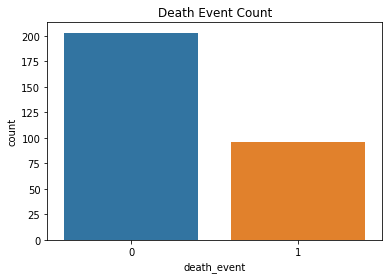

In [18]:
#Countplot
sns.countplot(data=data,x='death_event').set(title='Death Event Count');

In [19]:
data['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

In [20]:
96/299

0.3210702341137124

In [21]:
203/299

0.6789297658862876

Only for around 32% of the people in the dataset ended-up dying. Or they are still alive or the data collectors didn't registered this event

#### Treating the age variable

I'll add a column to show age ranges, instead of age number itself

In [22]:
data['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

In [23]:
print('Min age:',data['age'].min())
print('Max age:',data['age'].max())

Min age: 40.0
Max age: 95.0


In [24]:
data['age_interval'] = pd.cut(data['age'],bins=[0,40,50,60,70,80,90,100],labels=['Less than 41','41-50','51-60','61-70','71-80','81-90','More than 91'])

In [25]:
data['age_interval'].value_counts().sort_index()

Less than 41     7
41-50           67
51-60           88
61-70           85
71-80           34
81-90           15
More than 91     3
Name: age_interval, dtype: int64

In [26]:
#Check if there are any ages that aren't in the interval above
data.loc[data['age_interval'].isna()]

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,binary_gender,smoking,death_event,age_interval


In [27]:
data.head()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,binary_gender,smoking,death_event,age_interval
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1,71-80
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1,51-60
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1,61-70
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1,41-50
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1,61-70


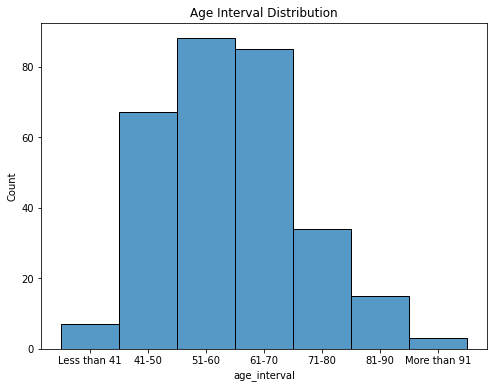

In [28]:
#Visualize in a histogram
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='age_interval').set(title='Age Interval Distribution');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


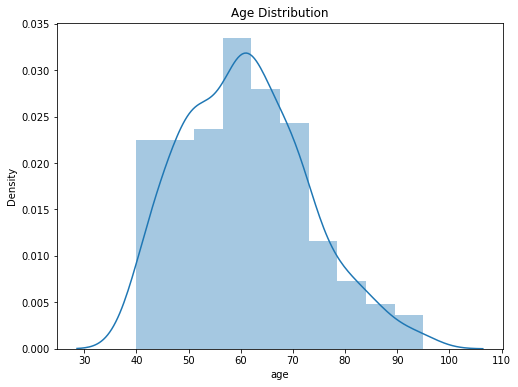

In [29]:
#Distribution of the age itself
plt.figure(figsize=(8,6))
sns.distplot(data['age']).set(title='Age Distribution');

#### Count and distribution of other variables

In [30]:
#Count of binary gender
data['binary_gender'].value_counts()

1    194
0    105
Name: binary_gender, dtype: int64

In [31]:
#Smoking count
data['smoking'].value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [32]:
data.groupby('age_interval').count()['smoking']

age_interval
Less than 41     7
41-50           67
51-60           88
61-70           85
71-80           34
81-90           15
More than 91     3
Name: smoking, dtype: int64

Interesting to notice that the older ages concentrate higher number of smokers

In [33]:
data['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [34]:
data['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [35]:
data['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [36]:
data['death_event'].value_counts()

0    203
1     96
Name: death_event, dtype: int64

#### Correlation

In [37]:
data.corr()

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,binary_gender,smoking,death_event
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
binary_gender,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [38]:
#Correlation test. This is important to evaluate if the correlation is statistically significant
from scipy.stats.stats import pearsonr

In [39]:
def calculate_pvalues(dataframe):
  dataframecols = pd.DataFrame(columns=dataframe.columns)
  pvalues = dataframecols.transpose().join(dataframecols,how='outer')
  for r in dataframe.columns:
    for c in dataframe.columns:
      tmp = dataframe[dataframe[r].notnull() & dataframe[c].notnull()]
      pvalues[r][c] = round(pearsonr(tmp[r],tmp[c])[1],4)
  return pvalues

In [40]:
#As the function only works with numerical data types, I need to filter out the column "age_interval"
data2 = data.drop(columns='age_interval',axis=1)

In [41]:
calculate_pvalues(data2)

,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,binary_gender,smoking,death_event
age,0.0,0.1289,0.1594,0.0812,0.3003,0.1074,0.367,0.0058,0.4284,0.2594,0.7479,0.0
anaemia,0.1289,0.0,0.0009,0.8265,0.5868,0.5107,0.4507,0.3687,0.4706,0.1019,0.0639,0.2533
creatine_phosphokinase,0.1594,0.0009,0.0,0.8682,0.4476,0.2236,0.6735,0.7775,0.3047,0.1688,0.9667,0.2796
diabetes,0.0812,0.8265,0.8682,0.0,0.9334,0.8265,0.1116,0.4183,0.1223,0.0063,0.0108,0.9733
ejection_fraction,0.3003,0.5868,0.4476,0.9334,0.0,0.6738,0.2133,0.8457,0.0023,0.0102,0.2459,0.0
high_blood_pressure,0.1074,0.5107,0.2236,0.8265,0.6738,0.0,0.3893,0.9323,0.5227,0.0709,0.337,0.1711
platelets,0.367,0.4507,0.6735,0.1116,0.2133,0.3893,0.0,0.4779,0.2843,0.0305,0.6268,0.3972
serum_creatinine,0.0058,0.3687,0.7775,0.4183,0.8457,0.9323,0.4779,0.0,0.001,0.9045,0.6368,0.0
serum_sodium,0.4284,0.4706,0.3047,0.1223,0.0023,0.5227,0.2843,0.001,0.0,0.635,0.9339,0.0007
binary_gender,0.2594,0.1019,0.1688,0.0063,0.0102,0.0709,0.0305,0.9045,0.635,0.0,0.0,0.9408


Note above that not all the correlations are significant, such as 'anaemia' vs 
'creatine_phosphokinase'

Also, at least in this dataset, the correlation between 'death_event' and 'age' is positive (0.26), but not statiscally significant according to the p-value

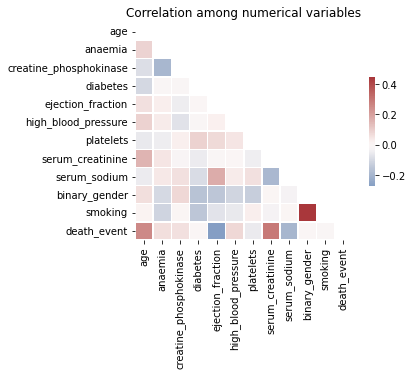

In [42]:
# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(),dtype=bool)
mask[np.triu_indices_from(mask)] = True

#Generate a custom color map
#cmap = sns.diverging_palette(330,20,as_cmap=True)

#Draw the heatmap
sns.heatmap(data.corr(),cmap='vlag',mask=mask,center=0,square=True,linewidth=.5,cbar_kws={'shrink':.5}).set_title('Correlation among numerical variables');

#### Simple Linear Regression  

In [43]:
from sklearn.linear_model import LinearRegression

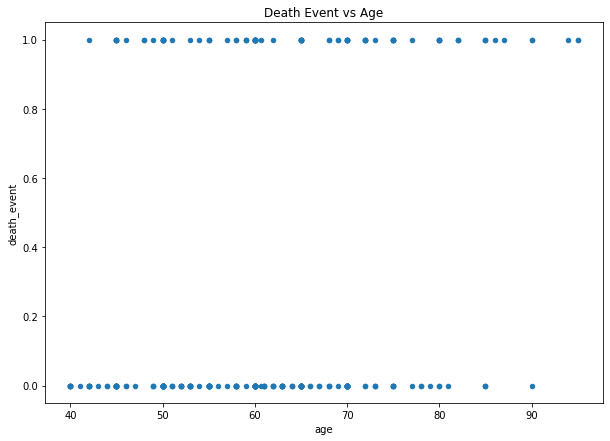

In [44]:
#Target variable ('death_event') vs 'age'
data.plot.scatter(x='age',y='death_event',figsize=(10,7))
_ = plt.title('Death Event vs Age');

In [45]:
data.death_event.corr(data.age)

0.2537285430880036

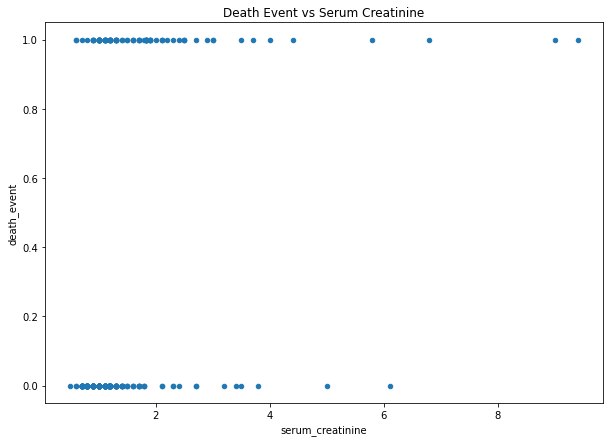

In [46]:
#Target variable ('death_event') vs 'serum_creatinine'
data.plot.scatter(x='serum_creatinine',y='death_event',figsize=(10,7))
_ = plt.title('Death Event vs Serum Creatinine');

In [47]:
data.death_event.corr(data.serum_creatinine)

0.2942775609841493

Even the variables that present a stronger correlation with 'death_event' don't have a high correlation.

Just for ilustration, I'll run a test with 'serum_creatinine', as this variable presents the strongest correlation with death_event (even though it's not so high)

#### Train-Test Split

In [48]:
Y = data['death_event']
del data['death_event']
X = data

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [50]:
print(X_train.shape)
X_train.head(2)

(209, 12)


,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,binary_gender,smoking,age_interval
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,51-60
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,61-70


In [51]:
print(X_test.shape)
X_test.head(2)

(90, 12)


,age,anaemia,creatine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,binary_gender,smoking,age_interval
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,61-70
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,41-50


In [52]:
print(Y_train.shape)
Y_train.head(2)

(209,)


224    0
68     1
Name: death_event, dtype: int64

In [53]:
print(Y_test.shape)
Y_test.head(2)

(90,)


281    0
265    0
Name: death_event, dtype: int64

#### Model training

In [54]:
#Creates an instance of the Linear Regression
lm = LinearRegression()
lm.fit(X_train[['serum_creatinine']], Y_train)

LinearRegression()

#### Prediction

In [55]:
Y_pred = lm.predict(X_test[['serum_creatinine']])

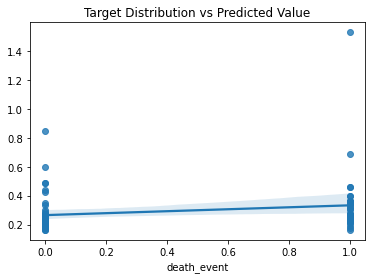

In [56]:
_ = sns.regplot(x=Y_test,y=Y_pred).set_title('Target Distribution vs Predicted Value')

In [57]:
#Test of the model using serum_creatinine average
data['serum_creatinine'].mean()

1.3938795986622072

In [58]:
#Take the regression coefficients
beta = lm.coef_
intercept = lm.intercept_
print(beta)
print(intercept)

[0.15561621]
0.06862591062543652


In [59]:
#Runs the equation
(beta*1.3938795986622072) + intercept

array([0.28553618])

#### Metrics evaluation

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [61]:
#Mean Squared Error
#The bigger the MSE, worse is the model
mse = mean_squared_error(Y_test,Y_pred)

In [62]:
mse

0.2529536111016264

In [63]:
#Mean Absolute Error
mae = mean_absolute_error(Y_test,Y_pred)
mae

0.44217517052735983

In [64]:
#R2 score
#The bigger the score, better is the model
r2_score(Y_test,Y_pred)

-0.04483643545291871

It seems that my model is not so good ☹

#### Multiple Linear Regression

As I couldn't achieve a reasonable result using a simple Linear Regression, let's check the model behaves by applying all the features

In [65]:
data.columns

Index(['age', 'anaemia', 'creatine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'binary_gender', 'smoking',
       'age_interval'],
      dtype='object')

In [66]:
columns = ['age', 'anaemia', 'creatine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'binary_gender', 'smoking']

In [67]:
lm.fit(X_train[columns],Y_train)

LinearRegression()

In [68]:
Y_pred = lm.predict(X_test[columns])

In [69]:
beta = lm.coef_
intercept = lm.intercept_

In [70]:
beta.tolist()

[0.009967355346403122,
 -0.0026584928934655864,
 1.918937418291492e-05,
 0.002258734611890911,
 -0.01005544031595456,
 0.05860495996916041,
 -7.219656696652935e-08,
 0.1424975730911577,
 -0.006248411658007246,
 -0.11251587204601511,
 0.041187907871839166]

In [71]:
intercept

0.767499196524092

In [72]:
mae = mean_absolute_error(Y_test,Y_pred)
mae

0.39335735739481953

In [73]:
r2_score(Y_test,Y_pred)

0.07280302887355783

The r2_score still isn't so high, but the model works better when using all the features

In [74]:
#Check coefficients weights
weight = pd.DataFrame(list(zip(columns,lm.coef_.tolist())),columns=['Names','Coefs'])
weight

,Names,Coefs
0,age,9.967355e-03
1,anaemia,-2.658493e-03
2,creatine_phosphokinase,1.918937e-05
3,diabetes,2.258735e-03
4,ejection_fraction,-1.005544e-02
5,high_blood_pressure,5.860496e-02
6,platelets,-7.219657e-08
7,serum_creatinine,1.424976e-01
8,serum_sodium,-6.248412e-03
9,binary_gender,-1.125159e-01


By far, 'age' is the variable with the highest weight in the model

To continue this, it would be interesting to reset the 'data' dataframe and run linear regressions using different targets and, than, see how it behaves